## Build a simple trading strategy 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
pwd

'C:\\Users\\Jacob'

### 1. Munging the stock data and add two columns - MA10 and MA50

In [21]:
#from Jan 01, 2018 - Sep 30, 2020, from yahoo finance
fb = pd.read_csv('C:/Users/Jacob/facebook.csv')
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
1,2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2,2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
3,2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
4,2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


In [22]:
fb = fb.dropna()
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
1,2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2,2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
3,2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
4,2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


In [23]:
fb=fb.set_index(['Date'])

In [24]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700


In [25]:
#create - MA10 and MA50


fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2020-09-23,255.259995,257.989990,248.149994,249.020004,249.020004,19641300,259.605998,261.118001
2020-09-24,246.500000,252.240005,245.619995,249.529999,249.529999,20006800,257.749998,261.303001
2020-09-25,249.399994,255.750000,246.610001,254.820007,254.820007,18351300,256.571001,261.580801
2020-09-28,259.399994,259.600006,254.820007,256.820007,256.820007,18826300,255.638002,261.876601
2020-09-29,257.809998,263.329987,256.899994,261.790009,261.790009,20200200,254.575001,262.204001


### 2. Add "Shares" column to make decisions base on the strategy 

In [26]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
#Long means purchase, short means sell stock

fb['Shares'] = [1 if fb.loc[i, 'MA10']>fb.loc[i, 'MA50'] else 0 for i in fb.index]

In [27]:
##fb.head(100)
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
Date,,,,,,,,,
2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900,NaN,NaN,0
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600,NaN,NaN,0
2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900,NaN,NaN,0
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500,NaN,NaN,0
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700,NaN,NaN,0


In [28]:
fb['Close1'] = fb['Close'].shift(-1)

In [29]:
fb.tail(100)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1
Date,,,,,,,,,,
2020-05-08,212.240005,213.210007,210.850006,212.350006,212.350006,12524000,201.599002,176.053401,1,213.179993
2020-05-11,210.889999,215.000000,210.369995,213.179993,213.179993,12893100,204.167001,176.467601,1,210.100006
2020-05-12,213.289993,215.279999,210.000000,210.100006,210.100006,14704600,206.886002,176.740801,1,205.100006
2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,207.977002,177.125001,1,206.809998
2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,208.187001,177.426001,1,210.880005
...,...,...,...,...,...,...,...,...,...,...
2020-09-23,255.259995,257.989990,248.149994,249.020004,249.020004,19641300,259.605998,261.118001,0,249.529999
2020-09-24,246.500000,252.240005,245.619995,249.529999,249.529999,20006800,257.749998,261.303001,0,254.820007
2020-09-25,249.399994,255.750000,246.610001,254.820007,254.820007,18351300,256.571001,261.580801,0,256.820007


In [30]:
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]

In [31]:
fb.tail(100)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit
Date,,,,,,,,,,,
2020-05-08,212.240005,213.210007,210.850006,212.350006,212.350006,12524000,201.599002,176.053401,1,213.179993,0.829987
2020-05-11,210.889999,215.000000,210.369995,213.179993,213.179993,12893100,204.167001,176.467601,1,210.100006,-3.079987
2020-05-12,213.289993,215.279999,210.000000,210.100006,210.100006,14704600,206.886002,176.740801,1,205.100006,-5.000000
2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,207.977002,177.125001,1,206.809998,1.709992
2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,208.187001,177.426001,1,210.880005,4.070007
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23,255.259995,257.989990,248.149994,249.020004,249.020004,19641300,259.605998,261.118001,0,249.529999,0.000000
2020-09-24,246.500000,252.240005,245.619995,249.529999,249.529999,20006800,257.749998,261.303001,0,254.820007,0.000000
2020-09-25,249.399994,255.750000,246.610001,254.820007,254.820007,18351300,256.571001,261.580801,0,256.820007,0.000000


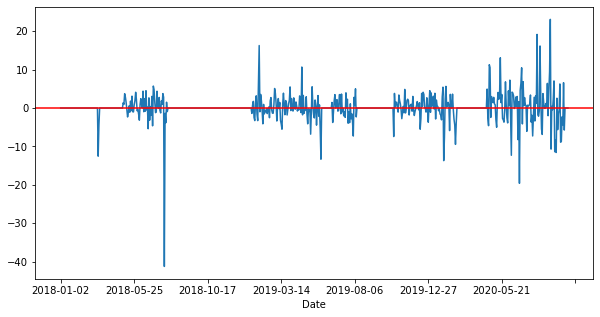

In [32]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss
plt.figure(figsize=(10, 5))
fb['Profit'].plot()
plt.axhline(y=0, color='red')


### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [33]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail(100)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2020-05-08,212.240005,213.210007,210.850006,212.350006,212.350006,12524000,201.599002,176.053401,1,213.179993,0.829987,21.649994
2020-05-11,210.889999,215.000000,210.369995,213.179993,213.179993,12893100,204.167001,176.467601,1,210.100006,-3.079987,18.570007
2020-05-12,213.289993,215.279999,210.000000,210.100006,210.100006,14704600,206.886002,176.740801,1,205.100006,-5.000000,13.570007
2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600,207.977002,177.125001,1,206.809998,1.709992,15.279999
2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900,208.187001,177.426001,1,210.880005,4.070007,19.350006
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23,255.259995,257.989990,248.149994,249.020004,249.020004,19641300,259.605998,261.118001,0,249.529999,0.000000,57.490005
2020-09-24,246.500000,252.240005,245.619995,249.529999,249.529999,20006800,257.749998,261.303001,0,254.820007,0.000000,57.490005
2020-09-25,249.399994,255.750000,246.610001,254.820007,254.820007,18351300,256.571001,261.580801,0,256.820007,0.000000,57.490005


Text(0.5, 1.0, 'Total money you win is 57.490005')

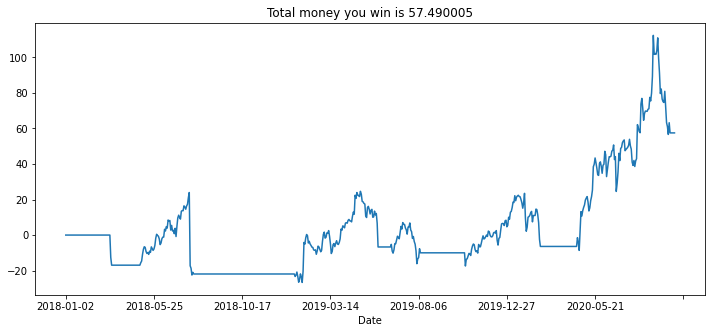

In [34]:
#plot the wealth to show the growth of profit over the period
plt.figure(figsize=(12, 5))
fb['wealth'].plot(label='wealth')
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

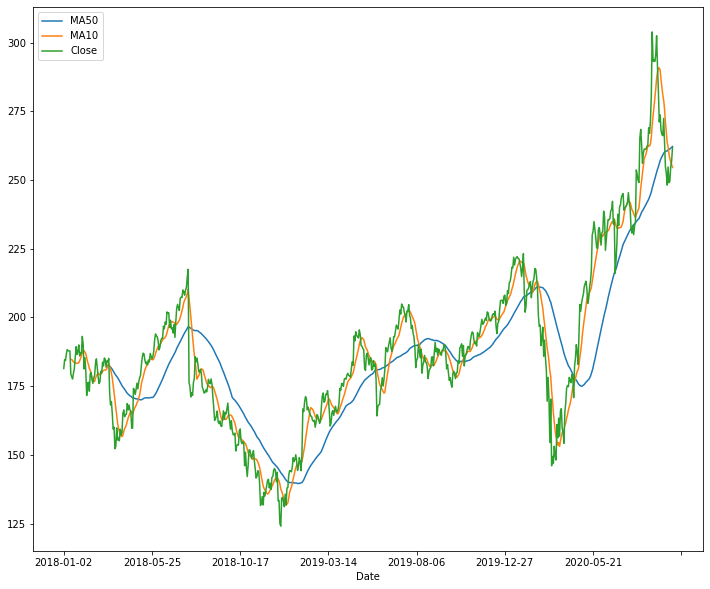

In [35]:

#plot the moving average
plt.figure(figsize=(12, 10))
fb['MA50'].loc['2018-01-01':'2020-09-30'].plot(label='MA50')
fb['MA10'].loc['2018-01-01':'2020-09-30'].plot(label='MA10')
fb['Close'].loc['2018-01-01':'2020-09-30'].plot(label='Close')
plt.legend()
plt.show()


In [36]:
#MA10>MA50, share=1 =>trading strategy
fb['wealth'].loc['2020-05-21':'2020-07-30']

Date
2020-05-21    43.380005
2020-05-22    40.669998
2020-05-26    37.610000
2020-05-27    33.930008
2020-05-28    33.559997
2020-05-29    40.380005
2020-06-01    41.190002
2020-06-02    38.630005
2020-06-03    34.759994
2020-06-04    39.240005
2020-06-05    39.869995
2020-06-08    47.139999
2020-06-09    45.199997
2020-06-10    32.899994
2020-06-11    37.050003
2020-06-12    40.970001
2020-06-15    44.119995
2020-06-16    44.000000
2020-06-17    44.410003
2020-06-18    47.259994
2020-06-19    47.690002
2020-06-22    50.710006
2020-06-23    42.490005
2020-06-24    44.149994
2020-06-25    24.550003
2020-06-26    29.110000
2020-06-29    35.540008
2020-06-30    46.020004
2020-07-01    41.889999
2020-07-02    48.750000
2020-07-06    49.330002
2020-07-07    52.050003
2020-07-08    52.970001
2020-07-09    53.540008
2020-07-10    47.470001
2020-07-13    48.199997
2020-07-14    48.750000
2020-07-15    49.399994
2020-07-16    50.500000
2020-07-17    53.889999
2020-07-20    50.220001
2020-07-21 